# 학습 관련 기술들

**신경망 학습의 핵심 개념들을 살펴본다.**
- 가중치 매개변수의 최적값을 탐색하는 최적화 방법
- 가중치 매개변수 초기값
- 하이퍼파라미터 설정 방법 등

**+오버피팅의 대응책**
- 가중치 감소
- 드롭아웃 등의 정규화 방법
- 배치 정규화

## 매개변수 갱신


신경망 학습의 목적은 손실함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이다. 이는 곧 매개변수의 최적값을 찾는 문제이며 이러한 문제를 푸는 것을 **최적화**라고 한다. 

신경망 문제에서는 매개변수 공간이 매우 넓고 복잡해서 신경망 최적화는 어려운 문제이다. 
- 특히, 심층 신경망에서는 매개변수의 수가 엄청나게 많아지기 때문에 더 어려운 문제가 된다. 

지금까지 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기(미분)을 이용했다. 매개변수의 기울기를 구해 기울어진 방향으로 매개변수 값을 갱시하는 일을 반복해서 최적의 값으로 다가갔다. 이것이 **확률적 경사 하강법(SGD)** 이라는 단순한 방법이다. 

SGD의 단점을 알아본 후 SGD와 다른 최적화 기법도 알아본다.

### 모험가 이야기

*한 모험가가 있다. 산맥을 여행하면서 날마다 깊은 골짜기를 찾아 발걸음을 옮긴다. 전설에 나오는 가장 깊고 낮은 골짜기(깊은 곳)을 찾으려 한다. 이 때, 엄격한 제약 2개를 둔다. 하나는 지도를 보지 않을 것, 또 하나는 눈가리개를 쓰는 것이다. 즉, 골짜기가 어디에 있는지 알 수 없다. 이 때, 어떻게 골짜기를 찾아갈 것인가? 또, 어떻게 걸음을 옮겨야 골짜기를 효율적으로 찾을 수 있을 것인가?*

### 확률적 경사 하강법(SGD)

SGD의 수식은 다음과 같이 적을 수 있다.

$$
\mathbf{W} \leftarrow \mathbf{W}-\eta \frac{\partial L}{\partial \mathbf{W}}
$$


이 때, 학습률 $\eta$는 0.01이나 0.001등의 값을 미리 정해서 사용한다. 

In [1]:
class SGD : 
    def __init__(self, lr = 0.01) :
        self.lr = lr 
        
    def update(self, params, grads) : 
        for key in params.keys() : 
            params[key] -= self.lr * grads[key]

### SGD의 단점

SGD는 단순하고 구현도 쉽지만, 문제에 따라서 비효율적일 때가 있다. 

다음 함수의 최솟값을 구하는 문제를 생각해보자. 

$$
f(x, y)=\frac{1}{20} x^{2}+y^{2}
$$

이 함수의 그래프와 등고선을 표현해보면 다음과 같다.

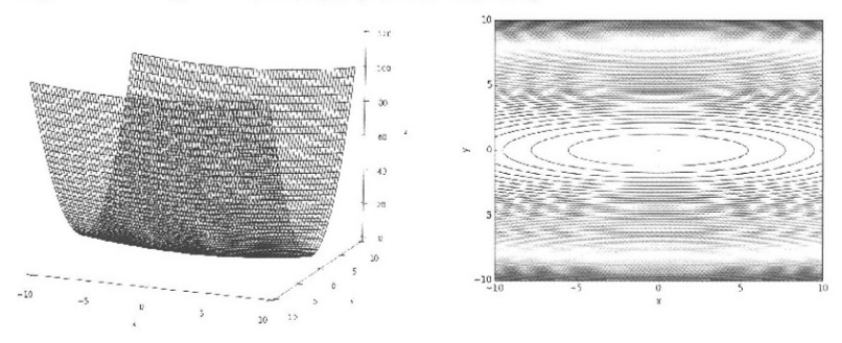


또한 기울기를 표현하면 다음과 같다.

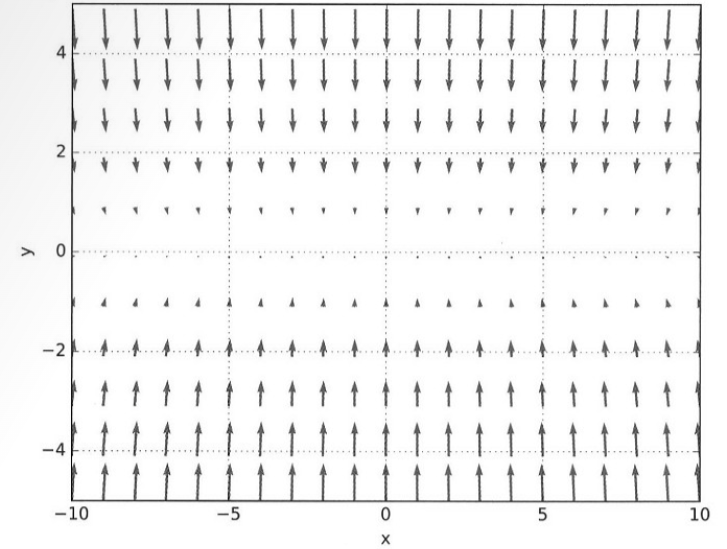

SGD에 의한 최적화 갱신 경로는 다음과 같다.

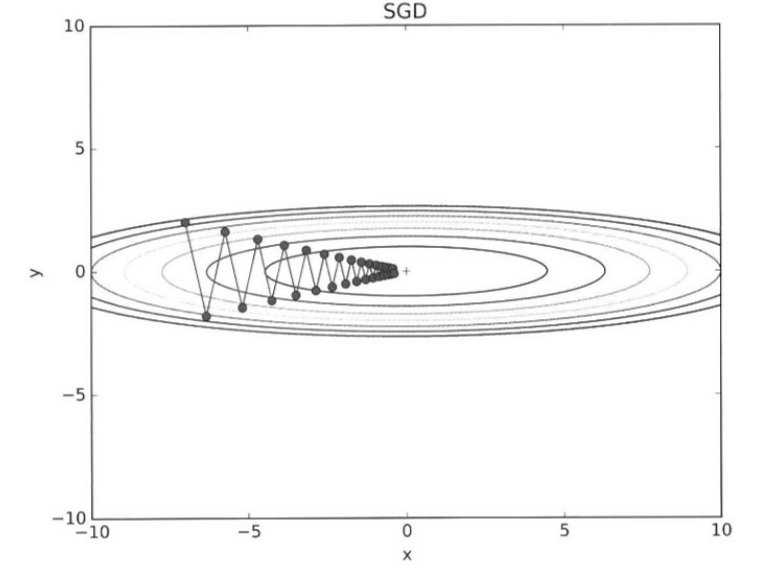

SGD의 단점은 방향에 따라 기울기가 달라지는 함수에서는 탐색 경로가 비효율적이라는 단점이 있다. 이 때는 SGD처럼 무작정 기울어진 방향으로 탐색하는 것보다 더 효율적인 방법이 필요하다. 

또, 지그재그로 움직이는 이유가 기울어진 방향이 원래의 최솟값과 다른 방향을 가리키기 때문이라는 점도 생각해봐야 한다.

이러한 단점을 보완하기 위한 방법인 모멘텀, AdaGrad, Adam 등의 방법이 있다.

### 모멘텀

모멘텀은 운동량, 가속도 등의 의미를 가지는 단어로, 다음과 같이 쓸 수 있다.
$$
\begin{gathered}
\mathbf{v} \leftarrow \alpha \mathbf{v}-\eta \frac{\partial L}{\partial \mathbf{W}} \\
\mathbf{W} \leftarrow \mathbf{W}+\mathbf{v}
\end{gathered}
$$

기울기가 (-)방향일 때 v가 증가, (+)방향일 때 v가 감소한다.

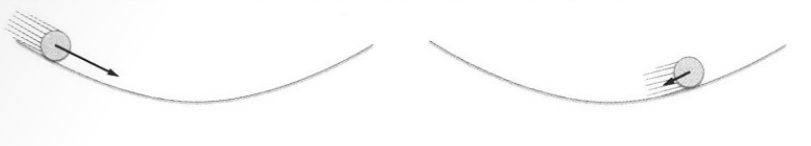

또, 식의 $\alpha \mathbf{v}$항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다.($\alpha$는 0.9등의 값으로 설정)
- 물리에서 지면 마찰이나 공기 저항에 해당한다.

In [2]:
class Momentum : 
    def __init__(self, lr = 0.01, momentum = 0.9) : 
        self.lr = lr 
        self.momentum = momentum
        self.v = None 
        
    def update(self, params, grads) : 
        if self.v is None : 
            self.v = {} 
            for key, val in params.items() : 
                self.v[key] = np.zeros_like(val)
                
        
        for key in params.keys() : 
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

모멘텀에 의한 갱신 경로를 보면, 공이 그릇 바닥을 구르듯 움직인다. SGD에 비해 지그재그의 정도가 덜한 것을 알 수 있다.
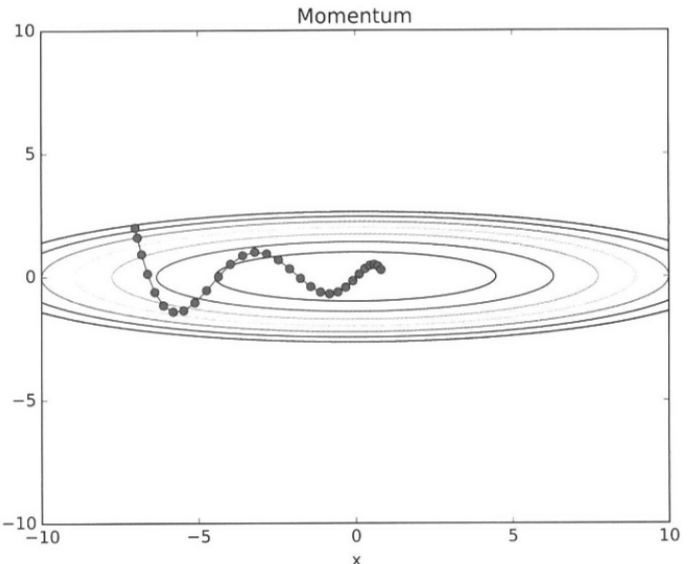


### AdaGrad

신경망 학습에서는 학습률이 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고, 너무 커지면 발산하여 학습이 제대로 이루어지지 않는다. 이 학습률을 정하는 효과적 기술로 **학습률 감소(learning rate decay)** 가 있다.

이는 학습을 진행하면서 학습률을 점차 줄여가는 방식인데, 처음에는 크게 학습하다가 조금씩 작게 학습하는 것이다. 

실제 신경망 학습에 자주 쓰인다.

학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 전체의 학습률을 일괄적으로 낮추는 것이다. 이를 더욱 발전시킨 것이 AdaGrad이다. 

이 방법은 각각의 매개변수에 맞춘 값을 만들어준다.

수식은 다음과 같다.

$$
\begin{aligned}
&\mathbf{h} \leftarrow \mathbf{h}+\frac{\partial L}{\partial \mathbf{W}} \odot \frac{\partial L}{\partial \mathbf{W}} \\
&\mathbf{W} \leftarrow \mathbf{W}-\eta \frac{1}{\sqrt{\mathbf{h}}} \frac{\partial L}{\partial \mathbf{W}}
\end{aligned}
$$


$\mathbf{h}$라는 변수가 새롭게 등장한다. 이 변수는 기존 기울기 값을 제곱해서 계속 더해준다. 그리고 매개변수를 갱신할 때 $\frac{1}{\sqrt{\mathbf{h}}}$ 을 곱해서 학습률을 조정한다.

즉, 크게 갱신된(기울기가 큰) 값은 학습률이 낮아진다는 뜻인데,다시 말해서 학습률 감소가 매개변수의 원소마다 다르게 적용된다는 의미이다.

In [3]:
class AdaGrad : 
    def __init__(self, lr = 0.01) : 
        self.lr = lr 
        self.h = None 
        
    def update(self, params, grads) : 
        if self.h is None : 
            self.h = {} 
            for key, value in params.items() : 
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys() : 
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) 

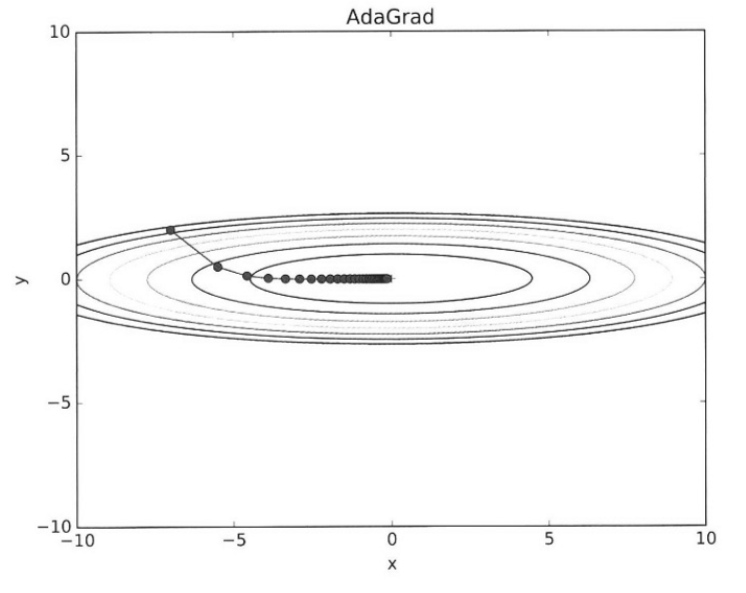

최솟값을 향해 효율적으로 움직인다. y축 방향은 기울기가 커서 처음에는 크게 움직이지만그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아진다. 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고 지그재그 움직임이 줄어든다.

### Adam 

모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보였다. AdaGrad는 매개변수의 원소마다 적응적으로 갱신 정도를 조정했다. 
> 이 두 기법을 융합하면 어떻게 될까? $\rightarrow$ **Adam**

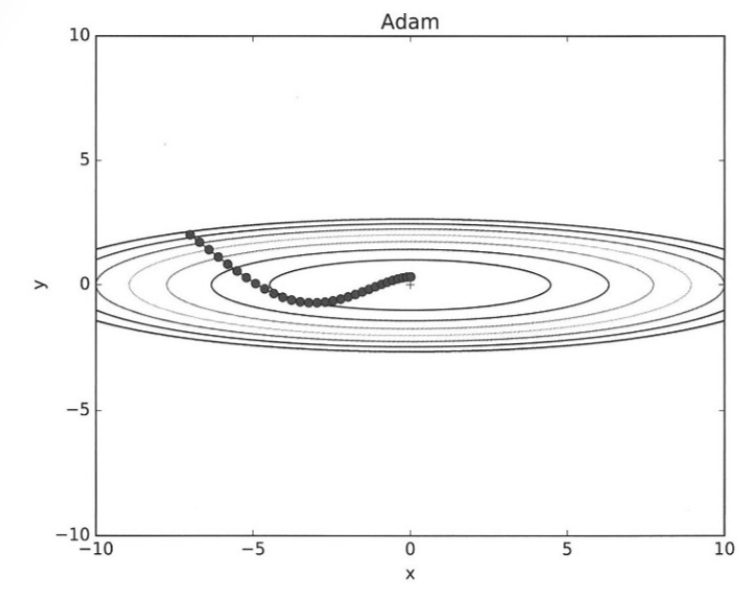

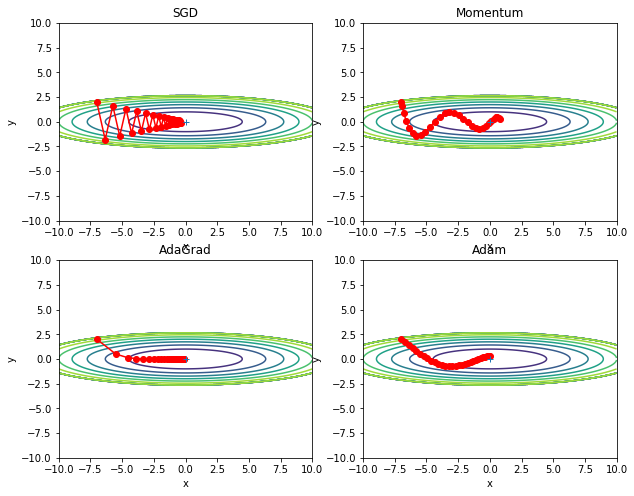

In [4]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8] 
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

### MNIST 를 이용한 갱신 방법 비교

===========iteration:0===========
SGD:2.3106221627738366
Momentum:2.335063812100082
AdaGrad:2.2711705363987065
Adam:2.2012115837241577
===========iteration:100===========
SGD:1.7016626239831691
Momentum:0.39264856883015303
AdaGrad:0.19221515508011136
Adam:0.2798991217075016
===========iteration:200===========
SGD:0.8004334332710112
Momentum:0.24493193962179463
AdaGrad:0.06127314406204071
Adam:0.1489361465188267
===========iteration:300===========
SGD:0.439014197142003
Momentum:0.1527954475024388
AdaGrad:0.05913953508316135
Adam:0.13972288872532657
===========iteration:400===========
SGD:0.4598253398209559
Momentum:0.17247641224459137
AdaGrad:0.06698126304277388
Adam:0.13630856688423204
===========iteration:500===========
SGD:0.35006961368556355
Momentum:0.12238758559902936
AdaGrad:0.04171098591162764
Adam:0.11044934645893123
===========iteration:600===========
SGD:0.3054928373356606
Momentum:0.12665485914578054
AdaGrad:0.0734943529993836
Adam:0.08024760718852492
===========iteration:70

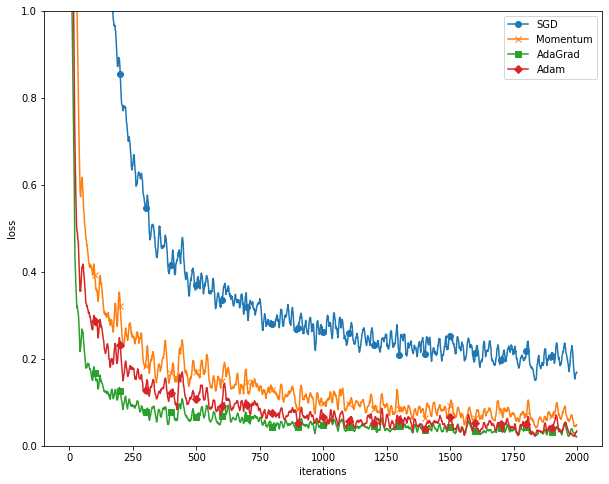

In [5]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

하이퍼 파라미터인 학습률과 신경망의 구조(층 깊이 등)에 따라 결과가 달라지지만, 한 가지 눈여겨볼 점은 일반적으로 SGD보다 다른 세 기법이 빠르고 정확하다는 것이다.

## 가중치의 초깃값

초기값이 학습의 성패를 가르는 경우가 많다. 

권장 초기값에 대해서 살펴보고 실험을 통해 신경망 학습이 이뤄지는 과정을 확인

### 초기값을 0으로 하면?(가중치를 균일한 값으로 설정하면 안 되는 이유)

초기값을 균일한 값으로 설정하게 되면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문에 학습이 제대로 이루어지지 않는다.
> 따라서 가중치가 고르게 되어버리는 상황을 막기 위해서는 초기값을 무작위로 설정해야 한다.

### 은닉층의 활성화값 분포

은닉층의 활성화값(활성화 함수의 출력 데이터)를 보면 중요한 정보를 얻을 수 있다.

가중치의 초기값에 따라 은닉층 활성화값들이 변하는 양상을 살펴보자. 이 때 활성화 함수로 시그모이드 함수를 사용하고, 5층 신경망에 무작위로 생성한 입력 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려본다.

In [6]:
plt.rcParams["figure.figsize"] = [10, 5] 
import numpy as np 
import matplotlib.pyplot as plt 

def sigmoid(x) : 
    return 1 / ( 1 + np.exp(-x))

def ReLU(x) : 
    return np.maximum(0, x) 

def tanh(x) : 
    return np.tanh(x)

def simul(w_idx, z_idx) :
    input_data = np.random.randn(1000, 100)
    node_num = 100 # 각 은닉층의 노드 수
    hidden_layer_size = 5 # 은닉층 5개
    activations = {} # 활성화 결과를 저장할 dictionary

    x = input_data

    for i in range(hidden_layer_size) : 
        if i != 0 : 
            x = activations[i-1]

        # 초기값을 다양하게 바꿔가며 실험
        w1 = np.random.randn(node_num, node_num) * 1
        w2 = np.random.randn(node_num, node_num) * 0.01
        w3 = np.random.randn(node_num, node_num) * np.sqrt(1.0/node_num)
        w4 = np.random.randn(node_num, node_num) * np.sqrt(2.0/node_num)
        
        w_lst = [w1, w2, w3, w4]
        w = w_lst[w_idx]
        a = np.dot(x, w)

        # 활성화 함수도 바꿔가며 실험
        z_lst = [sigmoid(a), ReLU(a), tanh(a)]
        activations[i] = z_lst[z_idx]

    # 히스토그램
    for i, a in activations.items() : 
        plt.subplot(1, len(activations), i+1)
        plt.title(str(i+1) + '-layer')
        if i != 0 : 
            plt.yticks([], [])
            plt.xlim(0, 1)
            plt.ylim(0, 7000)
        plt.hist(a.flatten(), 30, range = (0, 1))
    plt.show()



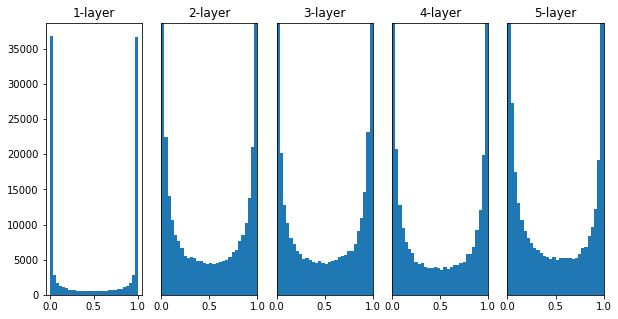

In [7]:
simul(w_idx = 0, z_idx = 0)

**가중치를 표준편차가 1인 정규분포로 초기화할 때의 각 층의 활성화값 분포**

각 층의 활성화값이 0와 1에 치우쳐있다. 시그모이드 함수는 출력값이 0이나 1에 가까워지면 미분이 0에 가까워진다. 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다. 이것이 **gradient vanishning**이라고 불리는 문제이다.

층이 깊게 하는 경우에 기울기 소실은 더 심각한 문제가 될 수 있다.

**표준편차를 0.01로 바꿔서 같은 실험 반복**

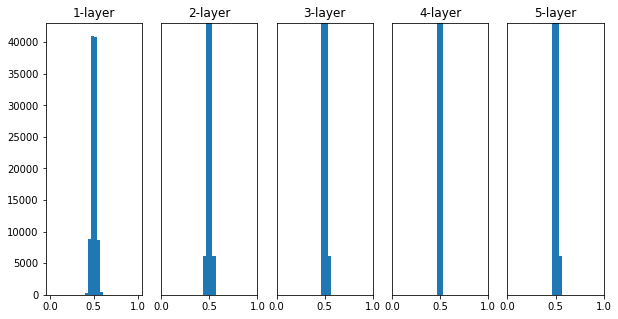

In [8]:
simul(w_idx = 1, z_idx = 0)

이번에는 0.5 부근에 집중되었다. 기울기 소실 문제는 발생하지 않지만 활성화 값들이 한 곳으로 치우쳤다는 것은 표현력 관점에서 문제가 있다는 것이다.
> 각 뉴런이 거의 같은 값을 출력하고 있기 때문에 여러 개의 뉴런을 두는 의미가 없어지는 것이다. 예를 들어 100개의 뉴런이 있는데 이 뉴런들이 거의 같은 값을 출력한다면, 1개의 뉴런과 다를 게 없는 것이다.

**Xavier 초기값**을 사용(권장 가중치)
- 일반적인 딥러닝 프레임워크들이 표준적으로 사용하고 있다.
- 앞 계층의 노드가 n개라면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포를 사용하면 된다는 결론을 이끌어냈음 

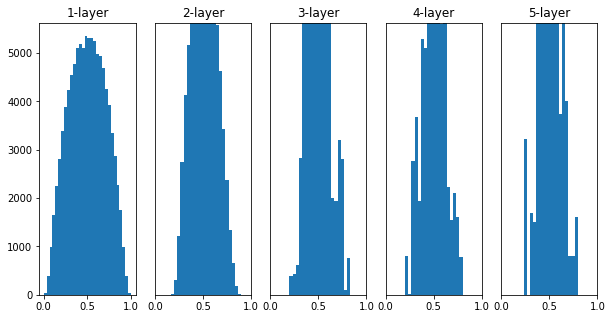

In [9]:
simul(w_idx = 2,  z_idx = 0)

층이 깊어지면서 형태가 다소 일그러지긴 하지만 위의 결과들보다는 확실히 넓게 분포된 것을 알 수 있다. 각 층에 흐르는 데이터가 적당히 퍼져있기 때문에 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이루어질 것으로 기대된다.

tanh를 이용하면 이 문제가 개선될 수 있다.

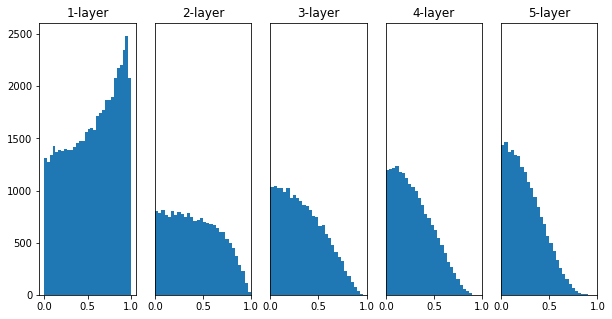

In [10]:
simul(w_idx = 2,  z_idx = 2)

### ReLU에서의 가중치 초기값

sigmoid와 tanh는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있고 Xavier 초기값이 적당하다. 반면 ReLU를 이용할 때는 ReLU에 특화된 초기값을 이용하라고 권장한다.

이 초기값은 He 초기값이라고 하며 앞 계층의 노드가 $n$개 일 때 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포 사용

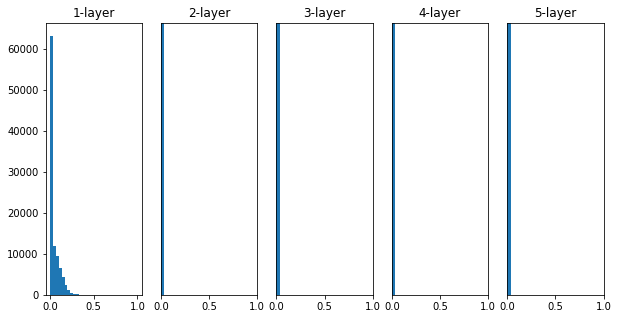

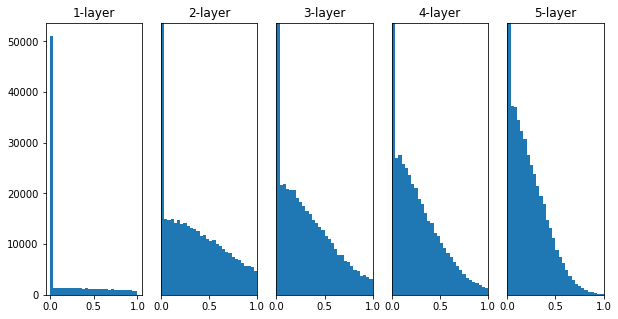

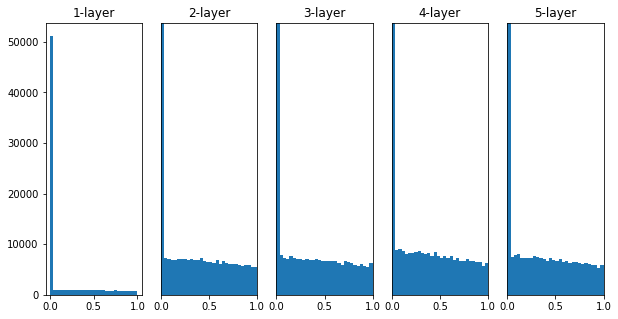

In [11]:
simul(w_idx = 1,  z_idx = 1)
simul(w_idx = 2,  z_idx = 1)
simul(w_idx = 3,  z_idx = 1)

std = 0.01일 때 각 층의 활성화값들은 아주 작은 값들을 갖는다. 이 말은 역전파 때의 가중치의 기울기 역시 작아진다는 의미이다. 그러면 학습은 거의 이루어지지 않는다.

Xavier 초기값 결과를 보면 층이 깊어지면서 치우침이 조금씩 커진다. 실제로 층이 깊어지면 활성화값들의 치우짐도 커지고 기울기 소실 문제가 발생한다. 

He 초기값은 모든 층에서 균일하게 분포된다. 역전파 때도 적절한 값이 나올 것으로 기대할 수 있다.

### MNIST 를 이용한 가중치 초기값 비교

In [13]:
import os 
import sys 

sys.path.append(os.pardir)

import numpy as np 
import pandas as pd 
from dataset.mnist import load_mnist 
from common.util import smooth_curve
from common.multi_layer import MultiLayerNet
from common.optimizer import SGD 

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

weight_init_types = {'std=0.01' : 0.01, 'Xavier' : 'sigmoid', 'He' : 'relu'}
optimizer = SGD(lr = 0.01)

networks = {}
train_loss = {}

for key, weight_type in weight_init_types.items() : 
    networks[key] = MultiLayerNet(input_size = 784, hidden_size_list = [100,100,100,100],
                                 output_size = 10, weight_init_std = weight_type)
    
    train_loss[key] = []
    
    
for i in range(max_iterations) : 
    batch_mask = np.random.choice(train_size, batch_size) 
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys() : 
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
        
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
        
    if i % 500 == 0 : 
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))
            


===========iteration:0===========
std=0.01:2.302522695835531
Xavier:2.3051384336271132
He:2.467426150951336
===========iteration:500===========
std=0.01:2.3001573374786766
Xavier:1.0153844932108107
He:0.5822083800809461
===========iteration:1000===========
std=0.01:2.2973220340771148
Xavier:0.45221200019299534
He:0.3362259186441733
===========iteration:1500===========
std=0.01:2.29896929870835
Xavier:0.32262689260895205
He:0.2199942183859362


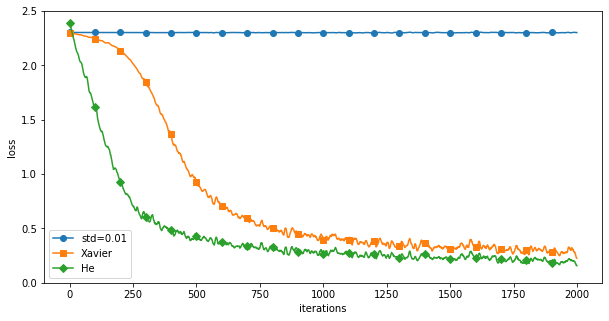

In [16]:
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

층별 뉴런 수가 100개인 5층 신경망에서 활성화 함수로 ReLU를 사용했을 때 std=0.01일 때 학습이 이루어지지 않았다.

순전파 때 너무 작은 값이 흐르기 때문이다. 그로 인해서 역전파 때의 기울기도 작아져서 가중치가 갱신되지 않았다.

반대로 Xavier와 He는 제대로 학습이 진행됐으며, He에서 더 빠르게 학습이 된 것을 알 수 있다.

## 배치 정규화

각 층의 활성화값 분포에 따라 가중치의 초기값을 적절히 설정하면 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 수행되는 것을 알 수 있다. 

각 층이 활성화값을 적당히 퍼뜨리도록 할 수도 있다. 이러한 아이디어에서 출발한 방법이 **배치 정규화** 이다.

배치 정규화의 장점
- 1. 학습을 빨리 진행할 수 있다(속도 개선)
- 2. 초기값에 크게 의존하지 않는다.(초기값 선택 문제 해소)
- 3. 오버피팅 방지(드롭아웃 등의 필요성 감소)

배치 정규화를 사용한 예
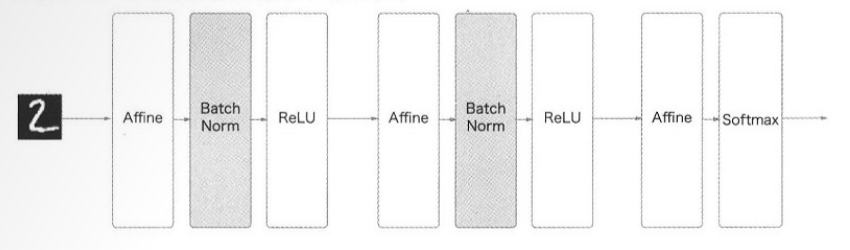

배치 정규화는 말 그대로 학습 시 미니배치를 단위로 정규화한다. 구체적으로는 표준정규분포를 따르도록 정규화한다.
수식으로는 다음과 같다.

$$
\begin{aligned}
&\mu_{B} \leftarrow \frac{1}{m} \sum_{i=1}^{m} x_{i} \\
&\sigma_{B}^{2} \leftarrow \frac{1}{m} \sum_{i=1}^{m}\left(x_{i}-\mu_{B}\right)^{2} \\
&\hat{x}_{i} \leftarrow \frac{x_{i}-\mu_{B}}{\sqrt{\sigma_{B}^{2}+\varepsilon}}
\end{aligned}
$$


이러한 처리를 활성화 함수의 앞 또는 뒤에 배치함으로써 데이터 분포를 덜 치우치게 할 수 있다.

또, 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대(scale)와 이동(shift) 변환을 수행한다. 수식으로는 다음과 같다.

$$
y_i=\gamma\hat{x}_i+\beta
$$

두 값은 처음에는 $\gamma=1, \beta=0$부터 시작하고 학습하면서 적합한 값으로 조정

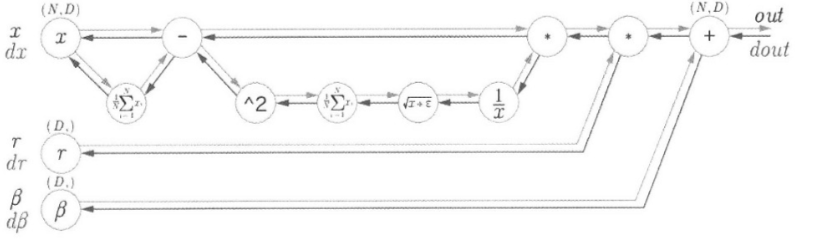

### 배치 정규화의 효과

In [14]:
from common.multi_layer_net_extend import MultiLayerNetExtend

In [19]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list




============== 1/16 ==============
epoch:0 | 0.097 - 0.152


../common/multi_layer_net_extend.py:105: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/multi_layer_net_extend.py:105: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
../common/functions.py:48: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:4 | 0.097 - 0.187
epoch:8 | 0.097 - 0.252
epoch:12 | 0.097 - 0.333
epoch:16 | 0.097 - 0.397
============== 2/16 ==============
epoch:0 | 0.1 - 0.055


../common/layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:4 | 0.097 - 0.143
epoch:8 | 0.097 - 0.229
epoch:12 | 0.097 - 0.319
epoch:16 | 0.097 - 0.417
============== 3/16 ==============
epoch:0 | 0.138 - 0.091
epoch:4 | 0.717 - 0.235
epoch:8 | 0.896 - 0.404
epoch:12 | 0.962 - 0.519
epoch:16 | 0.985 - 0.624
============== 4/16 ==============
epoch:0 | 0.132 - 0.109
epoch:4 | 0.547 - 0.335
epoch:8 | 0.716 - 0.537
epoch:12 | 0.775 - 0.651
epoch:16 | 0.845 - 0.743
============== 5/16 ==============
epoch:0 | 0.137 - 0.112
epoch:4 | 0.156 - 0.509
epoch:8 | 0.173 - 0.739
epoch:12 | 0.167 - 0.81
epoch:16 | 0.167 - 0.855
============== 6/16 ==============
epoch:0 | 0.095 - 0.074
epoch:4 | 0.149 - 0.623
epoch:8 | 0.117 - 0.806
epoch:12 | 0.118 - 0.877
epoch:16 | 0.12 - 0.92
============== 7/16 ==============
epoch:0 | 0.105 - 0.096
epoch:4 | 0.117 - 0.741
epoch:8 | 0.117 - 0.858
epoch:12 | 0.116 - 0.95
epoch:16 | 0.117 - 0.976
============== 8/16 ==============
epoch:0 | 0.117 - 0.116
epoch:4 | 0.117 - 0.791
epoch:8 | 0.117 - 0.938
epoch:12 | 0.1

/opt/py37-pytorch1.4/lib/python3.7/site-packages/ipykernel_launcher.py:88: MatplotlibDeprecationWarning: Unrecognized location 'top'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


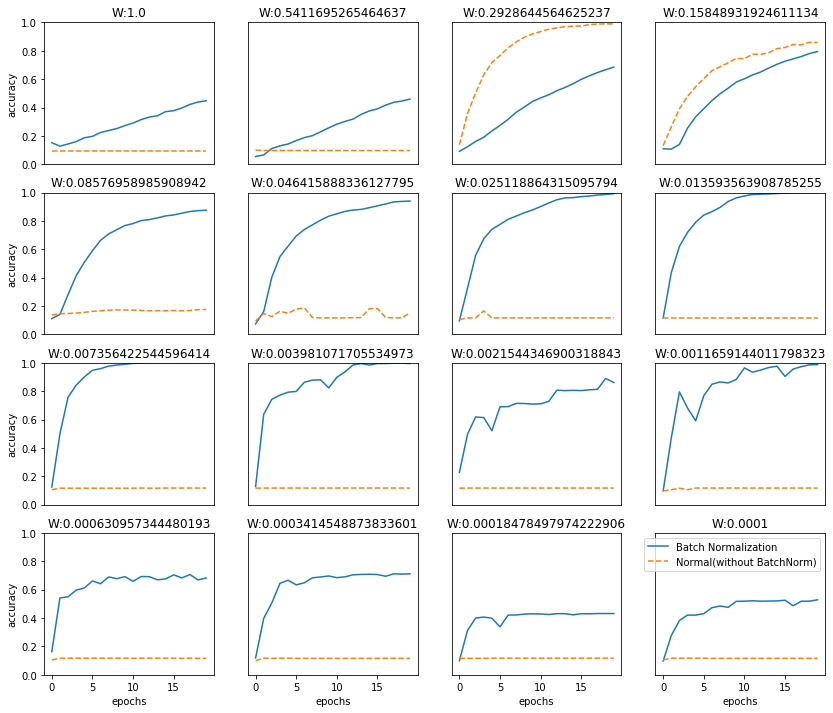

In [25]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam
plt.rcParams["figure.figsize"] = [14, 12] 

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
            
            if epoch_cnt % 4 == 0 : 
                print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")

plt.legend(loc = 'top')
    
plt.show()

대부분의 경우 배치 정규화를 사용한 쪽이 학습 진도가 빠르고 잘 학습되는 것을 볼 수 있다.

## 오버피팅 방지


### 오버피팅의 주된 원인
- 1. 매개변수가 많고 표현력이 높은 모델
- 2. 적은 훈련 데이터

오버피팅을 일으켜본다. 훈련 데이터는 300개만 사용하되 7층 네트워크, 각 층의 뉴런을 100개, 활성화 함수로 ReLU 사용
- 표현력이 높은 모형 생성

In [30]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.1, test acc:0.1025
epoch:1, train acc:0.10333333333333333, test acc:0.1043
epoch:2, train acc:0.10666666666666667, test acc:0.1059
epoch:3, train acc:0.12666666666666668, test acc:0.1077
epoch:4, train acc:0.13, test acc:0.1079
epoch:5, train acc:0.14, test acc:0.1105
epoch:6, train acc:0.14666666666666667, test acc:0.1131
epoch:7, train acc:0.15666666666666668, test acc:0.1151
epoch:8, train acc:0.18333333333333332, test acc:0.1238
epoch:9, train acc:0.2, test acc:0.1306
epoch:10, train acc:0.21, test acc:0.1345
epoch:11, train acc:0.25333333333333335, test acc:0.1508
epoch:12, train acc:0.30666666666666664, test acc:0.17
epoch:13, train acc:0.3233333333333333, test acc:0.1813
epoch:14, train acc:0.35333333333333333, test acc:0.2042
epoch:15, train acc:0.37, test acc:0.2256
epoch:16, train acc:0.37333333333333335, test acc:0.2331
epoch:17, train acc:0.38666666666666666, test acc:0.2491
epoch:18, train acc:0.41333333333333333, test acc:0.2684
epoch:19, train acc:0.

epoch:160, train acc:0.8933333333333333, test acc:0.6937
epoch:161, train acc:0.8966666666666666, test acc:0.7022
epoch:162, train acc:0.8933333333333333, test acc:0.6997
epoch:163, train acc:0.8933333333333333, test acc:0.7053
epoch:164, train acc:0.8933333333333333, test acc:0.6938
epoch:165, train acc:0.8933333333333333, test acc:0.7018
epoch:166, train acc:0.8933333333333333, test acc:0.6923
epoch:167, train acc:0.89, test acc:0.6979
epoch:168, train acc:0.8933333333333333, test acc:0.6969
epoch:169, train acc:0.8933333333333333, test acc:0.701
epoch:170, train acc:0.9, test acc:0.7036
epoch:171, train acc:0.8966666666666666, test acc:0.6974
epoch:172, train acc:0.8966666666666666, test acc:0.6972
epoch:173, train acc:0.8966666666666666, test acc:0.6958
epoch:174, train acc:0.8866666666666667, test acc:0.7087
epoch:175, train acc:0.8933333333333333, test acc:0.6998
epoch:176, train acc:0.89, test acc:0.6978
epoch:177, train acc:0.89, test acc:0.6992
epoch:178, train acc:0.893333333

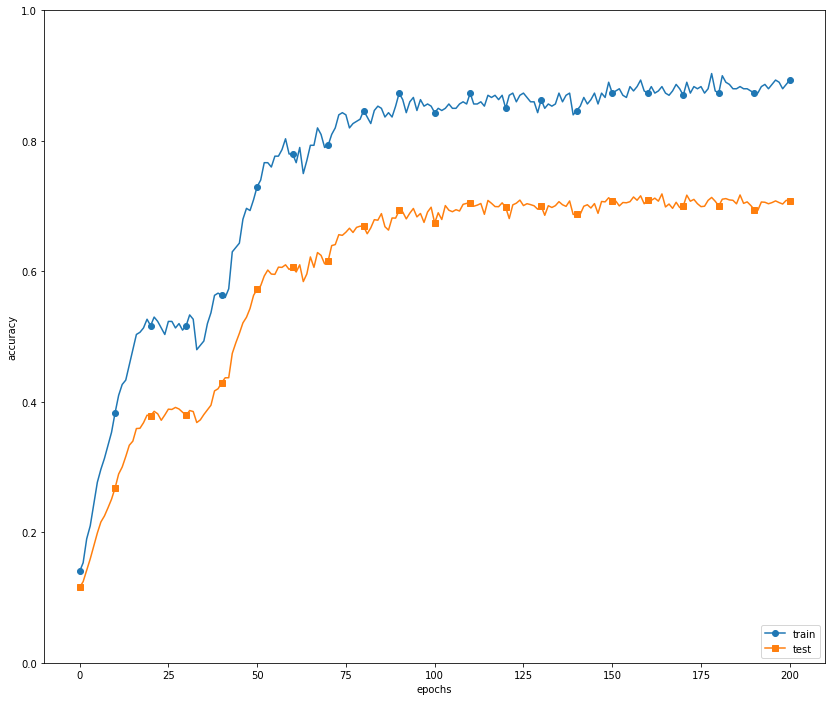

In [29]:
# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()